<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data = data.fillna(0)

In [ ]:
#data['TotalSpent'] = (data.loc[data['TotalSpent'] == ' ',  'TotalSpent'] = 0)
data['TotalSpent'] = data.TotalSpent.apply(lambda x: 0 if x == ' ' else x)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

(array([[5282.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [5282.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [2030.,  900.,  513.,  389.,  347.,  311.,  304.,  223.,  173.,
           92.]]),
 array([   0.  ,  868.48, 1736.96, 2605.44, 3473.92, 4342.4 , 5210.88,
        6079.36, 6947.84, 7816.32, 8684.8 ]),
 <a list of 3 Lists of Patches objects>)

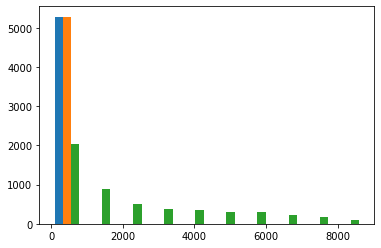

In [ ]:
plt.hist([data.ClientPeriod,
    data.MonthlySpending, data.TotalSpent])

In [ ]:
data.TotalSpent
data.TotalSpent = data.TotalSpent.astype(float)
data.ClientPeriod= data.ClientPeriod.astype(float)

In [ ]:
r = []
data.value_counts()
for x in cat_cols:
  r.append(data[x].value_counts())
r[0]

Male      2655
Female    2627
Name: Sex, dtype: int64

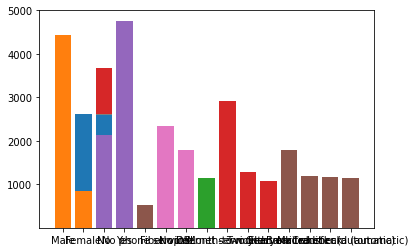

In [ ]:
#plt.figure(figsize=(30, 30))
for i in range(len(r)):
  plt.bar(r[i].index, r[i].values, bottom = True)

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
data.dtypes

ClientPeriod                float64
MonthlySpending             float64
TotalSpent                  float64
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

In [ ]:
#one = OneHotEncoder(categories = "auto",sparse = False, drop = "first")
#one.fit_transform(data.select_dtypes(include=['object']))
dummy_features = pd.get_dummies(data[cat_cols])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_data = scaler.fit_transform(data[num_cols])
numeric_data = pd.DataFrame(numeric_data)

In [ ]:
X = pd.concat([numeric_data, dummy_features], axis=1)
X_origin = data.iloc[:, :-1]

In [ ]:
y=data['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
model = LogisticRegression(max_iter=10000)
param = {'C':[100, 10, 1, 0.1, 0.01, 0.001]}
cv_model = GridSearchCV(model, param)

In [ ]:
cv_model.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf = cv_model.best_estimator_

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
!pip install catboost

     |████████████████████████████████| 65.7MB 57kB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cat_clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    )

cat_clf.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
)

0:	learn: 0.4947916	test: 0.4863188	best: 0.4863188 (0)	total: 5.74ms	remaining: 281ms
1:	learn: 0.4354232	test: 0.4417654	best: 0.4417654 (1)	total: 10.4ms	remaining: 250ms
2:	learn: 0.4124823	test: 0.4240377	best: 0.4240377 (2)	total: 14.6ms	remaining: 229ms
3:	learn: 0.3999952	test: 0.4243315	best: 0.4240377 (2)	total: 18.9ms	remaining: 217ms
4:	learn: 0.3910592	test: 0.4267750	best: 0.4240377 (2)	total: 23.1ms	remaining: 208ms
5:	learn: 0.3831719	test: 0.4285912	best: 0.4240377 (2)	total: 27.2ms	remaining: 200ms
6:	learn: 0.3790831	test: 0.4287415	best: 0.4240377 (2)	total: 31.3ms	remaining: 193ms
7:	learn: 0.3748428	test: 0.4339847	best: 0.4240377 (2)	total: 35.6ms	remaining: 187ms
8:	learn: 0.3673090	test: 0.4360444	best: 0.4240377 (2)	total: 39.7ms	remaining: 181ms
9:	learn: 0.3620602	test: 0.4374877	best: 0.4240377 (2)	total: 44.2ms	remaining: 177ms
10:	learn: 0.3547262	test: 0.4385107	best: 0.4240377 (2)	total: 48.4ms	remaining: 172ms
11:	learn: 0.3497158	test: 0.4379953	best:

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [ ]:
best_model = clf

In [ ]:
X_test = pd.read_csv('./test.csv')

In [ ]:
X_test[num_cols]
X_test = X_test.fillna(0)
X_test['TotalSpent'] = X_test.TotalSpent.apply(lambda x: 0 if x == ' ' else x)

In [ ]:
numeric_data = scaler.fit_transform(X_test[num_cols])
numeric_data = pd.DataFrame(numeric_data)
dummy_features = pd.get_dummies(X_test[cat_cols])
X_t = pd.concat([numeric_data, dummy_features], axis=1)

In [ ]:
X_t

,0,1,2,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.394782,-0.274027,0.057688,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0
1,-0.133958,1.147644,0.330847,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
2,-0.947404,0.401602,-0.695456,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,1.411590,0.326160,1.155787,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0
4,1.574279,-1.481107,-0.383600,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,1.574279,1.370619,2.344622,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0
1757,-0.784715,-1.455959,-0.877989,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1
1758,-1.232110,0.911258,-0.922638,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
1759,-0.540681,0.832463,-0.281293,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0


In [ ]:
best_model.predict_proba(X_t)[:,1]

array([0.04673567, 0.70817091, 0.69876358, ..., 0.77003063, 0.6409737 ,
       0.01560057])

In [ ]:
best_model.predict(X_t)

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:

submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_t)[:,1] #/ best_model.predict(X_t) 
submission.to_csv('./my_submission.csv')

In [ ]:
pd.DataFrame(submission['Churn'])

,Churn
0,0.046736
1,0.708171
2,0.698764
3,0.007721
4,0.003026
...,...
1756,0.099012
1757,0.032603
1758,0.770031
1759,0.640974


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.